## 택시요금과 주행거리에 따른 군집분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import folium
import datetime as dt

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
jan_mn = pd.read_csv("jan_mn.csv")

In [3]:
jan_mn.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_minuate,trip_km
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.4,24.0,24.0,4.50,0.0,0.0,0.0,4.50,Cash,41.901207,-87.676356,41.901207,-87.676356,3.0,0.6437
1,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.1,6.0,6.0,7.00,0.0,0.0,0.0,7.00,Cash,41.944227,-87.655998,41.944227,-87.655998,8.0,1.7703
2,1987.0,2016-1-8 18:15:00,2016-1-8 18:45:00,1080.0,6.2,8.0,3.0,17.75,0.0,0.0,0.0,17.75,Cash,41.899602,-87.633308,41.965812,-87.655879,18.0,9.9779
3,6400.0,2016-1-26 04:15:00,2016-1-26 04:15:00,60.0,0.2,16.0,16.0,3.75,0.0,0.0,0.0,3.75,Cash,41.953582,-87.723452,41.953582,-87.723452,1.0,0.3219
4,7418.0,2016-1-22 11:30:00,2016-1-22 11:45:00,180.0,0.0,8.0,32.0,5.00,2.0,0.0,1.5,8.50,Credit Card,41.892508,-87.626215,41.884987,-87.620993,3.0,0.0000


In [4]:
df = jan_mn[['trip_minuate','fare','tips','tolls','extras','trip_total','trip_km']]
df

,trip_minuate,fare,tips,tolls,extras,trip_total,trip_km
0,3.0,4.50,0.00,0.0,0.0,4.50,0.6437
1,8.0,7.00,0.00,0.0,0.0,7.00,1.7703
2,18.0,17.75,0.00,0.0,0.0,17.75,9.9779
3,1.0,3.75,0.00,0.0,0.0,3.75,0.3219
4,3.0,5.00,2.00,0.0,1.5,8.50,0.0000
...,...,...,...,...,...,...,...
1382089,9.0,12.25,2.45,0.0,0.0,14.70,0.3219
1382090,14.0,10.25,0.00,0.0,0.0,10.25,3.8624
1382091,23.0,44.00,5.00,0.0,0.0,49.00,28.8073
1382092,16.0,11.75,0.00,0.0,1.0,12.75,4.0234


In [5]:
X_list = list(df.columns)
X_list.remove('trip_total')

#### 표준화 및 역할 정의

In [6]:
# 데이터 표준화
scaler = StandardScaler()
# 목표변수 y를 trip_total로 설정

df_raw_x = scaler.fit_transform(df[X_list])
df_raw_y = scaler.fit_transform(df[['trip_total']])

## k-평균 군집분석

#### 군집 개수 찾기 : 각 데이터로부터 가장 가까운 군집 중심점까지의 거리 제곱합


In [7]:
# 최대 군집 생성 개수
n_iter_cluster = 5
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range : 
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로 부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster' : cluster_range,
                        'Error' : clus_error})
ds_error

,NumberofCluster,Error
0,1,8.292564e+06
1,2,7.025469e+06
2,3,5.790079e+06
3,4,4.580944e+06
4,5,3.490554e+06


#### 4-2) 군집별 군집 중시점까지 거리 제곱합 시각화

Text(0, 0.5, 'Sum of squared distance')

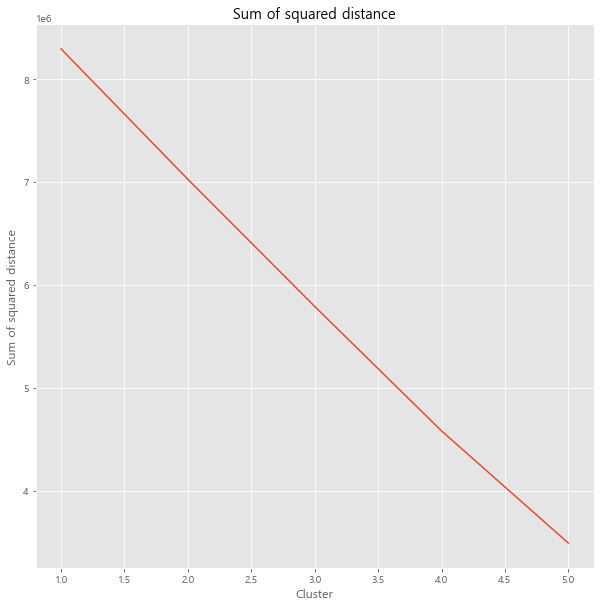

In [10]:
plt.figure(figsize = (10,10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title("Sum of squared distance")
plt.xlabel('Cluster')
plt.ylabel('Sum of squared distance')

#### 4-3) k-평균 군집 번호 생성

In [11]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df['ClusterKmeans'] = cluster_kmeans
df.head()

,trip_minuate,fare,tips,tolls,extras,trip_total,trip_km,ClusterKmeans
0,3.0,4.50,0.0,0.0,0.0,4.50,0.6437,1
1,8.0,7.00,0.0,0.0,0.0,7.00,1.7703,1
2,18.0,17.75,0.0,0.0,0.0,17.75,9.9779,1
3,1.0,3.75,0.0,0.0,0.0,3.75,0.3219,1
4,3.0,5.00,2.0,0.0,1.5,8.50,0.0000,1


#### 4-4) k-평균 군집별 데이터 요약

In [12]:
ds_summary_km = df.groupby("ClusterKmeans").agg(['min','mean','max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + '_' + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,trip_minuate_min,trip_minuate_mean,trip_minuate_max,fare_min,fare_mean,fare_max,tips_min,tips_mean,tips_max,...,tolls_max,extras_min,extras_mean,extras_max,trip_total_min,trip_total_mean,trip_total_max,trip_km_min,trip_km_mean,trip_km_max
0,1,0.0,9.594,70.0,0.00,9.803,300.00,0.0,0.794,7.15,...,75.00,0.00,0.516,1556.55,0.00,11.114,1562.55,0.0,3.018,321.869
1,2,0.0,6.839,24.0,3.25,8.784,33.75,0.0,0.000,0.00,...,0.00,3333.33,5524.261,9993.41,3336.58,5533.045,9997.16,0.0,1.594,18.025
2,3,3.0,13.583,56.0,4000.64,6691.447,9002.29,0.0,0.000,0.00,...,50.00,0.00,0.094,0.40,4050.74,6735.290,9052.39,0.0,42.473,1006.001
3,4,0.0,33.638,1439.0,0.00,39.016,3186.50,0.0,7.804,369.08,...,75.00,0.00,2.865,101.00,0.00,49.693,3186.50,0.0,24.128,4828.032
4,5,42.0,42.000,42.0,999.99,999.990,999.99,0.0,0.000,0.00,...,999.99,999.99,999.990,999.99,2999.97,2999.970,2999.97,0.0,0.000,0.000


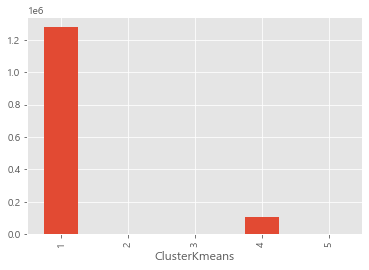

In [13]:
df.groupby('ClusterKmeans')['trip_total'].count().plot(kind='bar')

군집의 분포가 너무 불균형해서 이상치들을 제거하고 해본다.

[7.0, 14.25]


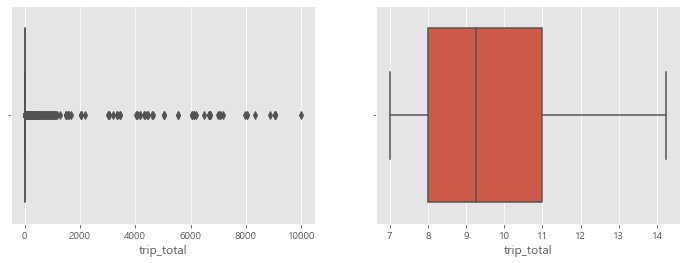

In [14]:
# trip_total 이상치 제거
tmp = list(df.trip_total.quantile([0.25, 0.75]))
print(tmp)
df_no = df[(df['trip_total'] >= tmp[0]) & (df['trip_total'] <= tmp[1])]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(df_no['trip_total'], ax=ax[1])
sns.boxplot(df['trip_total'], ax=ax[0])


In [15]:
X_list = list(df_no.columns)
X_list.remove('trip_total')

## 이상치 제거 후 군집분석 : trip_total

In [16]:
# 데이터 표준화
scaler = StandardScaler()
# 목표변수 y를 trip_total로 설정

df_raw_x = scaler.fit_transform(df_no[X_list])
df_raw_y = scaler.fit_transform(df_no[['trip_total']])

#### 4-1) 군집 개수 찾기 : 각 데이터로부터 가장 가까운 군집 중심점까지의 거리 제곱합


In [17]:
# 최대 군집 생성 개수
n_iter_cluster = 3
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range : 
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로 부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster' : cluster_range,
                        'Error' : clus_error})
ds_error

,NumberofCluster,Error
0,1,4.885657e+06
1,2,4.190038e+06
2,3,3.134884e+06


#### 4-2) 군집별 군집 중시점까지 거리 제곱합 시각화

Text(0, 0.5, 'Sum of squared distance')

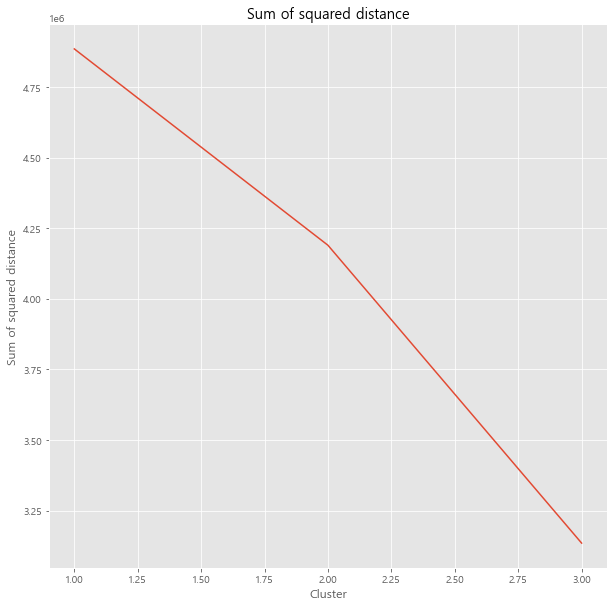

In [18]:
plt.figure(figsize = (10,10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title("Sum of squared distance")
plt.xlabel('Cluster')
plt.ylabel('Sum of squared distance')

#### 4-3) k-평균 군집 번호 생성

In [19]:
clus = KMeans(3)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_no['ClusterKmeans'] = cluster_kmeans
df_no.head()

,trip_minuate,fare,tips,tolls,extras,trip_total,trip_km,ClusterKmeans
1,8.0,7.00,0.0,0.0,0.0,7.00,1.7703,2
4,3.0,5.00,2.0,0.0,1.5,8.50,0.0000,1
5,8.0,7.00,1.0,0.0,0.0,8.00,2.0921,1
6,7.0,7.25,0.0,0.0,0.0,7.25,0.0000,2
9,8.0,9.00,0.0,0.0,0.0,9.00,0.1609,2


#### 4-4) k-평균 군집별 데이터 요약

In [20]:
ds_summary_km = df_no.groupby("ClusterKmeans").agg(['min','mean','max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + '_' + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,trip_minuate_min,trip_minuate_mean,trip_minuate_max,fare_min,fare_mean,fare_max,tips_min,tips_mean,tips_max,...,tolls_max,extras_min,extras_mean,extras_max,trip_total_min,trip_total_mean,trip_total_max,trip_km_min,trip_km_mean,trip_km_max
0,1,0.0,7.707,41.0,0.0,7.323,12.25,0.33,2.149,7.00,...,2.5,0.0,0.381,9.0,7.0,9.853,14.25,0.0,1.756,225.308
1,2,0.0,10.073,69.0,2.0,8.921,14.25,0.00,0.054,2.08,...,4.0,0.0,0.512,11.0,7.0,9.486,14.25,0.0,2.468,321.869
2,3,0.0,109.183,1439.0,0.0,8.548,14.25,0.00,2.434,13.00,...,0.0,0.0,0.309,4.0,7.0,11.291,14.25,0.0,219.272,869.046


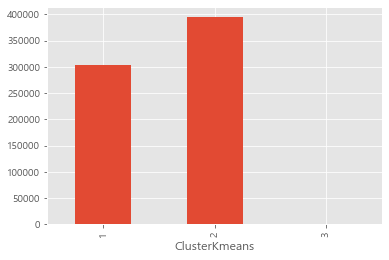

In [21]:
df_no.groupby('ClusterKmeans')['trip_total'].count().plot(kind='bar')

In [22]:
# 군집 번호 별로 데이터 프레임 생성
df_1 = df_no[df_no['ClusterKmeans'] == 1]
df_2 = df_no[df_no['ClusterKmeans'] == 2]
df_3 = df_no[df_no['ClusterKmeans'] == 3]

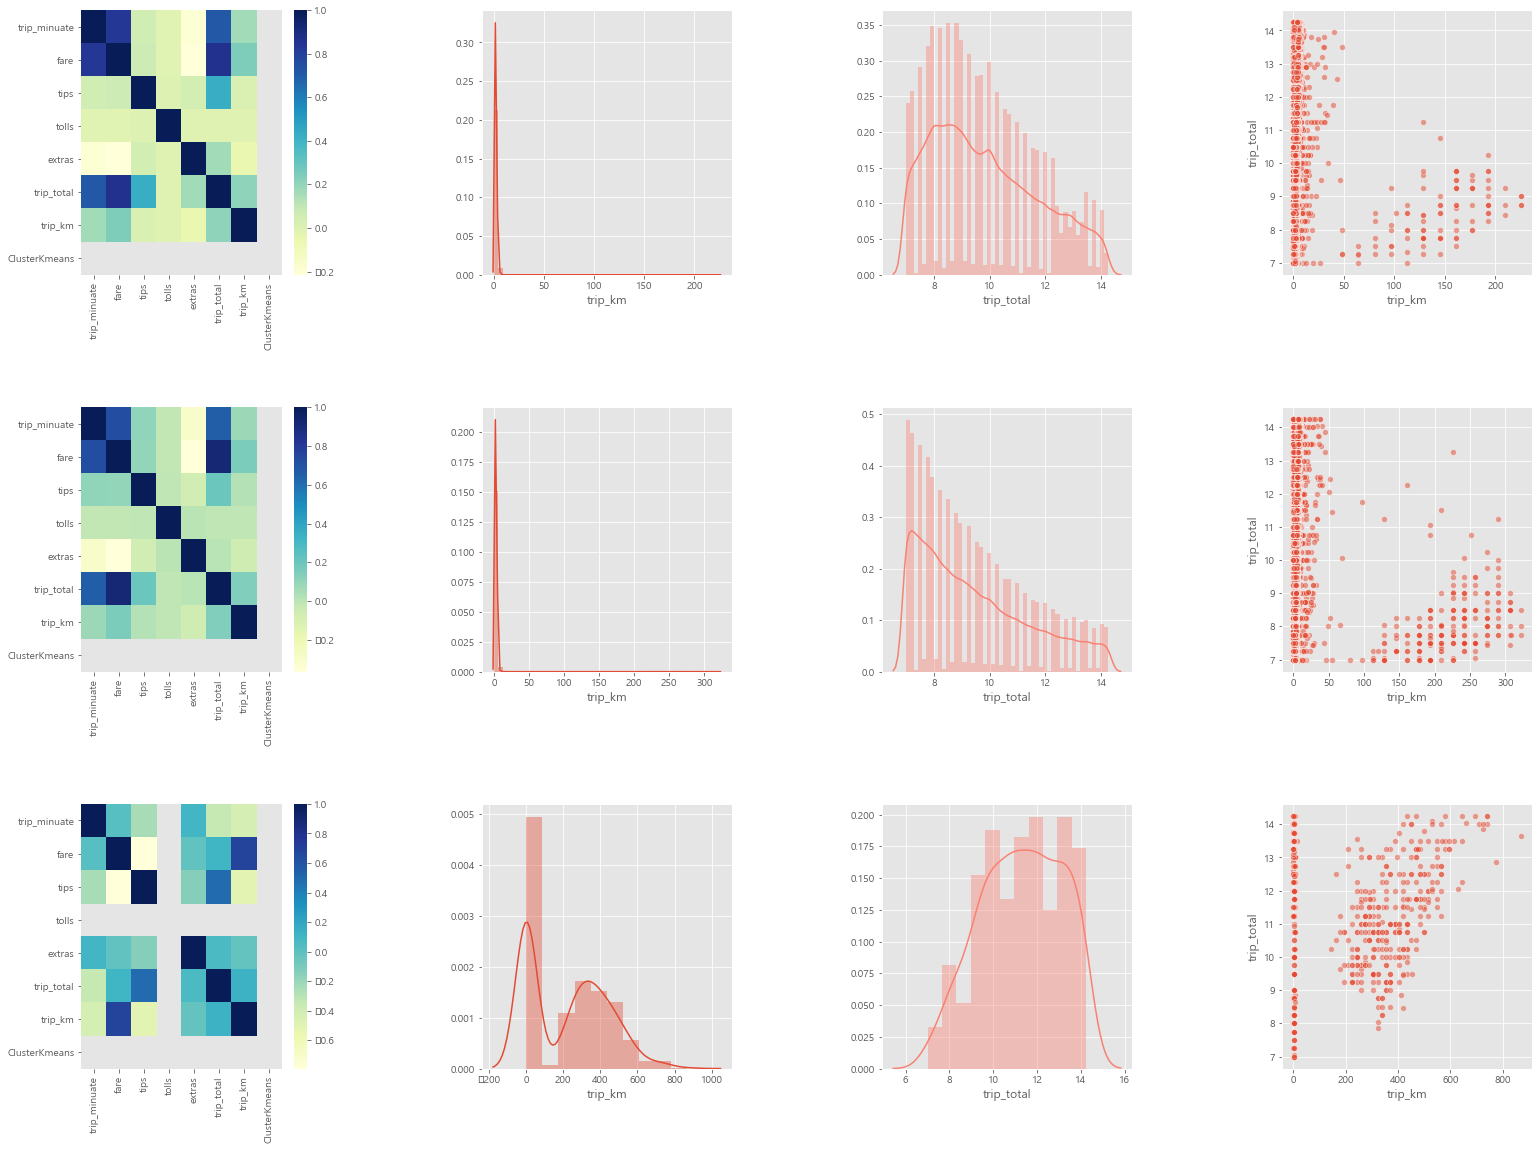

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(26,15))

sns.heatmap(df_1.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[0,0])
sns.heatmap(df_2.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[1,0])
sns.heatmap(df_3.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[2,0])

sns.distplot(df_1.trip_km, ax=ax[0,1])
sns.distplot(df_2.trip_km, ax=ax[1,1])
sns.distplot(df_3.trip_km, ax=ax[2,1])

sns.distplot(df_1.trip_total, ax=ax[0,2], color='salmon')
sns.distplot(df_2.trip_total, ax=ax[1,2], color='salmon')
sns.distplot(df_3.trip_total, ax=ax[2,2], color='salmon')

sns.scatterplot(data=df_1, y='trip_total', x='trip_km', ax=ax[0,3], alpha=0.5)
sns.scatterplot(data=df_2, y='trip_total', x='trip_km', ax=ax[1,3], alpha=0.5)
sns.scatterplot(data=df_3, y='trip_total', x='trip_km', ax=ax[2,3], alpha=0.5)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.6)

- 첫 번째 군집1을 보면, 가장 일반적인 택시 이용을 한 군집이라 할 수 있다. 총 요금(trip_total)과 fare가 상당히 높은 상관관계를 보여주고 tips와 tolls, extras 등이 다른 군집에 비해 상관계수가 높지 않다.
- 기본요금만 지불하는 정도의 택시 이용 건들이라고 할 수 있다. 산포도를 살펴보면 0~25km 정도까지 구간에 거의 대부분이 분포해있다.

- 두 번쨰 군집은 군집1과 거의 비슷하지만 총 요금이 주행 시간과 좀 더 

In [24]:
print(len(df_1), len(df_2), len(df_3))

302966 394427 558


# 데이터 이상치 대체 후 군집분석
- 데이터 중 주행거리가 0인데 요즘 정보가 존재하는 데이터가 1,384,038건 존재한다.
- 랜던포레스트를 사용하여 0값을 대체하고 다시 군집분석을 진행한다.

In [27]:
new_df = pd.read_csv('new_jan_1.csv')

In [28]:
df = new_df[['trip_minuate','fare','tips','tolls','extras','trip_total','trip_km']]
df

,trip_minuate,fare,tips,tolls,extras,trip_total,trip_km
0,3.0,4.50,0.00,0.0,0.0,4.50,0.643700
1,8.0,7.00,0.00,0.0,0.0,7.00,1.770300
2,18.0,17.75,0.00,0.0,0.0,17.75,9.977900
3,1.0,3.75,0.00,0.0,0.0,3.75,0.321900
4,3.0,5.00,2.00,0.0,1.5,8.50,1.001646
...,...,...,...,...,...,...,...
1384033,9.0,12.25,2.45,0.0,0.0,14.70,0.321900
1384034,14.0,10.25,0.00,0.0,0.0,10.25,3.862400
1384035,23.0,44.00,5.00,0.0,0.0,49.00,28.807300
1384036,16.0,11.75,0.00,0.0,1.0,12.75,4.023400


[7.0, 14.25]


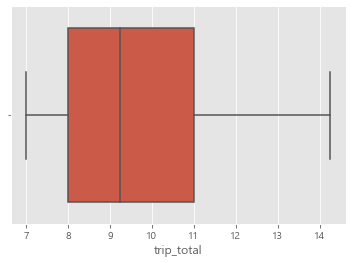

In [29]:
# trip_total 이상치 제거
tmp = list(df.trip_total.quantile([0.25, 0.75]))
print(tmp)
df = df[(df['trip_total'] >= tmp[0]) & (df['trip_total'] <= tmp[1])]

sns.boxplot(df['trip_total'])


In [31]:
X_list = list(df.columns)
X_list.remove('trip_total')

# 데이터 표준화
scaler = StandardScaler()
# 목표변수 y를 trip_total로 설정

df_raw_x = scaler.fit_transform(df[X_list])
df_raw_y = scaler.fit_transform(df[['trip_total']])

## k-means 군집분석

#### 군집 개수 찾기 : 각 데이터로부터 가장 가까운 군집 중심점까지의 거리 제곱합


In [32]:
# 최대 군집 생성 개수
n_iter_cluster = 3
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range : 
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로 부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster' : cluster_range,
                        'Error' : clus_error})
ds_error

,NumberofCluster,Error
0,1,4.189332e+06
1,2,3.493265e+06
2,3,2.865811e+06


#### 군집별 군집 중시점까지 거리 제곱합 시각화

Text(0, 0.5, 'Sum of squared distance')

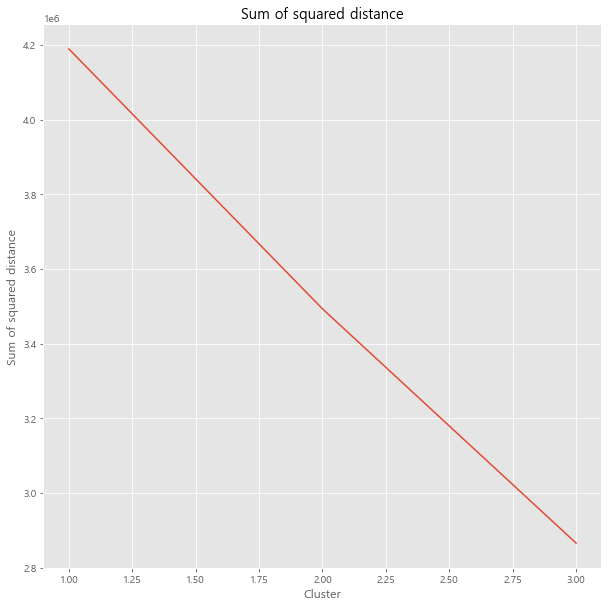

In [33]:
plt.figure(figsize = (10,10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title("Sum of squared distance")
plt.xlabel('Cluster')
plt.ylabel('Sum of squared distance')

#### k-평균 군집 번호 생성

In [34]:
clus = KMeans(3)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df['ClusterKmeans'] = cluster_kmeans
df.head()

,trip_minuate,fare,tips,tolls,extras,trip_total,trip_km,ClusterKmeans
1,8.0,7.00,0.0,0.0,0.0,7.00,1.770300,1
4,3.0,5.00,2.0,0.0,1.5,8.50,1.001646,2
5,8.0,7.00,1.0,0.0,0.0,8.00,2.092100,2
6,7.0,7.25,0.0,0.0,0.0,7.25,2.176131,1
9,8.0,9.00,0.0,0.0,0.0,9.00,0.160900,1


#### k-평균 군집별 데이터 요약

In [35]:
ds_summary_km = df.groupby("ClusterKmeans").agg(['min','mean','max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + '_' + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,trip_minuate_min,trip_minuate_mean,trip_minuate_max,fare_min,fare_mean,fare_max,tips_min,tips_mean,tips_max,...,tolls_max,extras_min,extras_mean,extras_max,trip_total_min,trip_total_mean,trip_total_max,trip_km_min,trip_km_mean,trip_km_max
0,1,0.0,10.222,1439.0,2.00,8.927,14.25,0.00,0.059,4.0,...,1.0,0.0,0.512,11.0,7.00,9.499,14.25,0.016,3.245,869.046
1,2,0.0,7.685,41.0,0.00,7.310,12.25,0.25,2.153,13.0,...,0.0,0.0,0.382,9.0,7.00,9.845,14.25,0.161,2.179,354.056
2,3,0.0,3.250,12.0,3.25,4.812,10.50,0.00,0.583,3.0,...,4.0,0.0,1.125,4.5,7.25,8.729,12.50,0.161,3.732,16.282


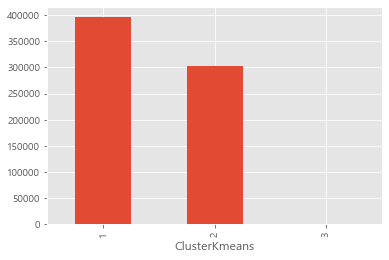

In [36]:
df.groupby('ClusterKmeans')['trip_total'].count().plot(kind='bar')

군집의 분포가 너무 불균형해서 이상치들을 제거하고 해본다.

In [37]:
# 군집 번호 별로 데이터 프레임 생성
df_1 = df[df['ClusterKmeans'] == 1]
df_2 = df[df['ClusterKmeans'] == 2]
df_3 = df[df['ClusterKmeans'] == 3]

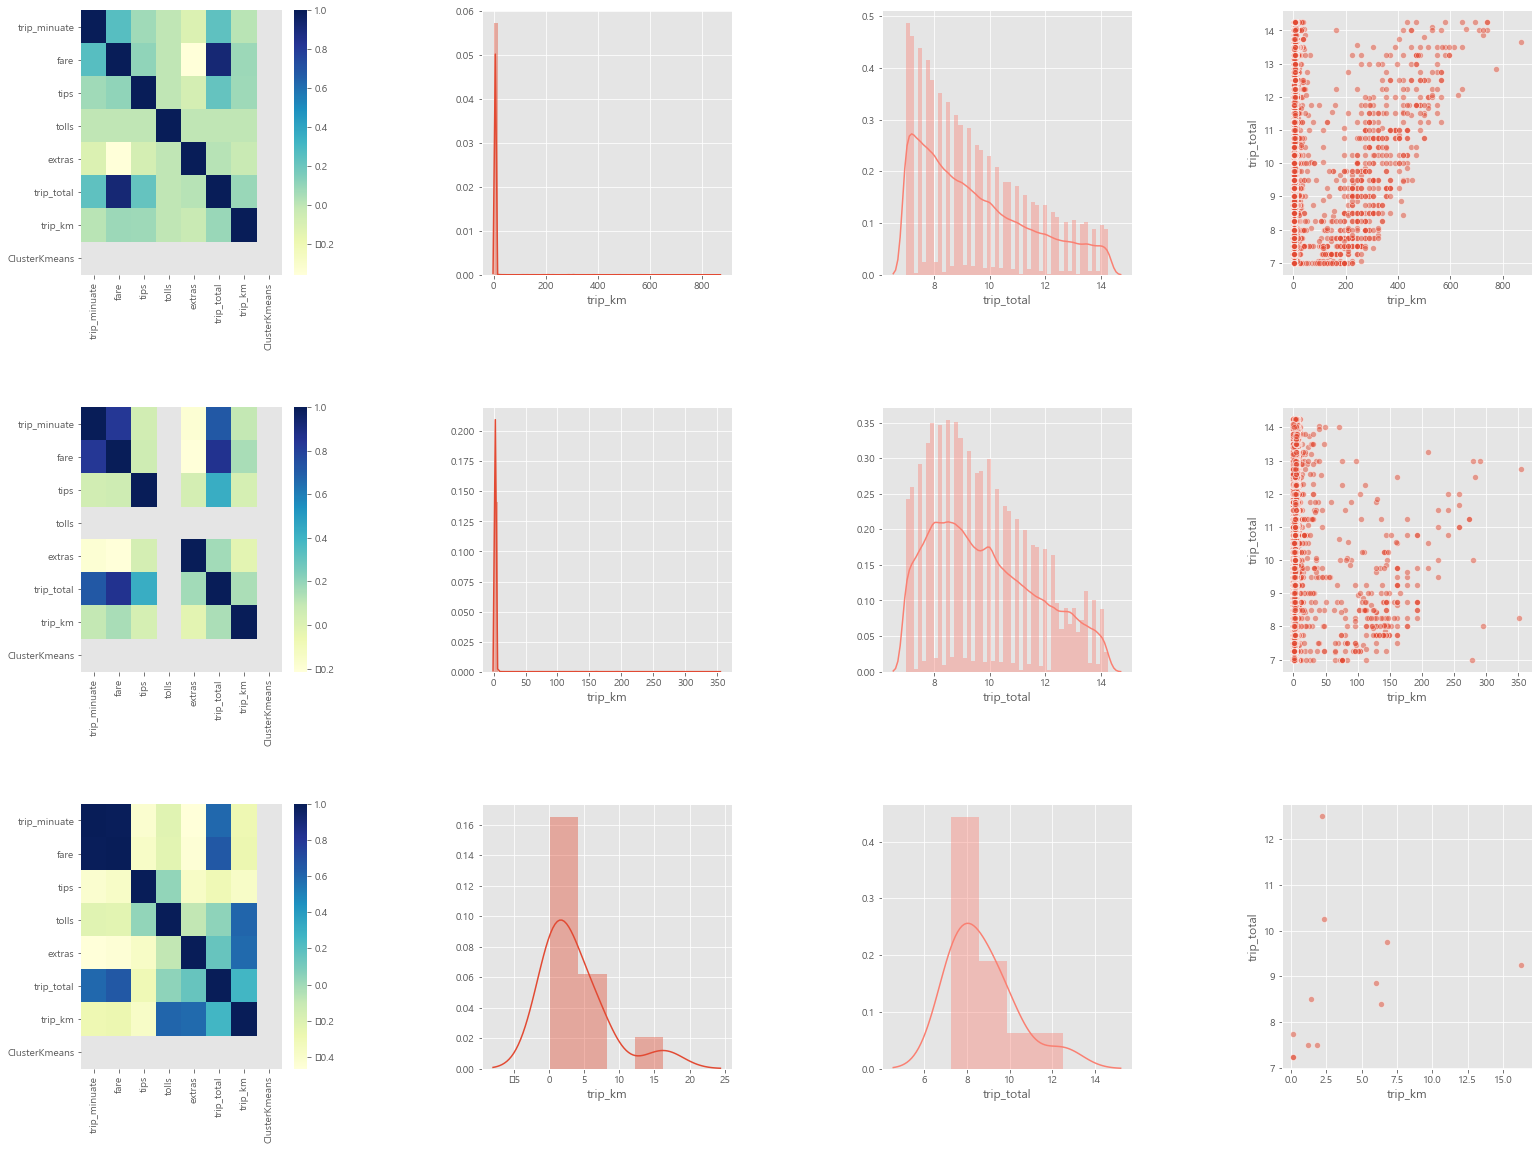

In [38]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(26,15))

sns.heatmap(df_1.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[0,0])
sns.heatmap(df_2.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[1,0])
sns.heatmap(df_3.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[2,0])

sns.distplot(df_1.trip_km, ax=ax[0,1])
sns.distplot(df_2.trip_km, ax=ax[1,1])
sns.distplot(df_3.trip_km, ax=ax[2,1])

sns.distplot(df_1.trip_total, ax=ax[0,2], color='salmon')
sns.distplot(df_2.trip_total, ax=ax[1,2], color='salmon')
sns.distplot(df_3.trip_total, ax=ax[2,2], color='salmon')

sns.scatterplot(data=df_1, y='trip_total', x='trip_km', ax=ax[0,3], alpha=0.5)
sns.scatterplot(data=df_2, y='trip_total', x='trip_km', ax=ax[1,3], alpha=0.5)
sns.scatterplot(data=df_3, y='trip_total', x='trip_km', ax=ax[2,3], alpha=0.5)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.6)

- 군집분석 결과를 살펴보면 주행 거리(trip_km)와 택시 요금(trip_total)간의 상관관계가 크지 않게 나타난다.
- 이상치 제거가 부족했던 것인지 다시 한번 봐야겠지만 주행거리가 0일 떄의 데이터가 너무 많거나, 짧은 거리의 데이터가 너무 많이 나타난다.
- 군집 3의 경우는 데이터 수가 확연하게 차이난다. 모델의 파라미터를 조정할 필요가 있어 보인다.

# 이상치 제거 후 군집분석 진행

In [5]:
df.head()

,trip_minuate,fare,tips,tolls,extras,trip_total,trip_km
0,3.0,4.50,0.0,0.0,0.0,4.50,0.6437
1,8.0,7.00,0.0,0.0,0.0,7.00,1.7703
2,18.0,17.75,0.0,0.0,0.0,17.75,9.9779
3,1.0,3.75,0.0,0.0,0.0,3.75,0.3219
4,3.0,5.00,2.0,0.0,1.5,8.50,0.0000


In [20]:
quan = np.array(df['trip_minuate'].quantile([0.25, 0.75]))

In [21]:
df[df['trip_minuate'] > quan[0]]

,trip_minuate,fare,tips,tolls,extras,trip_total,trip_km
1,8.0,7.00,0.00,0.0,0.0,7.00,1.7703
2,18.0,17.75,0.00,0.0,0.0,17.75,9.9779
5,8.0,7.00,1.00,0.0,0.0,8.00,2.0921
6,7.0,7.25,0.00,0.0,0.0,7.25,0.0000
7,23.0,17.25,5.18,0.0,0.0,22.43,8.2077
...,...,...,...,...,...,...,...
1382089,9.0,12.25,2.45,0.0,0.0,14.70,0.3219
1382090,14.0,10.25,0.00,0.0,0.0,10.25,3.8624
1382091,23.0,44.00,5.00,0.0,0.0,49.00,28.8073
1382092,16.0,11.75,0.00,0.0,1.0,12.75,4.0234


In [30]:
cond1 = (df['trip_minuate'] >= quan[0]) & (df['trip_minuate'] <= quan[1])
df.loc[cond1]

,trip_minuate,fare,tips,tolls,extras,trip_total,trip_km
1,8.0,7.00,0.00,0.0,0.0,7.00,1.7703
5,8.0,7.00,1.00,0.0,0.0,8.00,2.0921
6,7.0,7.25,0.00,0.0,0.0,7.25,0.0000
8,7.0,6.25,0.00,0.0,0.0,6.25,0.0000
9,8.0,9.00,0.00,0.0,0.0,9.00,0.1609
...,...,...,...,...,...,...,...
1382086,6.0,6.50,0.00,0.0,1.0,7.50,0.0000
1382088,6.0,5.75,0.00,0.0,0.0,5.75,1.2875
1382089,9.0,12.25,2.45,0.0,0.0,14.70,0.3219
1382090,14.0,10.25,0.00,0.0,0.0,10.25,3.8624


In [8]:
df.columns

Index(['trip_minuate', 'fare', 'tips', 'tolls', 'extras', 'trip_total',
       'trip_km'],
      dtype='object')

In [9]:
new_df = pd.DataFrame()

In [10]:
new_df

""


In [33]:
"{}".format('trip_')

'trip_'

In [35]:
def remove_outlier(df, column):
    quantile_array = np.array(df['{}'.format(column)].quantile([0.25, 0.75]))
    cond = (df['{}'.format(column)] >= quantile_array[0]) & (df['{}'.format(column)] <= quantile_array[1])
    new_df = df.loc[cond]
    return new_df                                              

In [36]:
new_df = remove_outlier(df, 'trip_minuate')

In [38]:
new_df = remove_outlier(df, 'fare')
new_df = remove_outlier(df, 'tips')
new_df = remove_outlier(df, 'tolls')

In [41]:
new_df = remove_outlier(df, 'extras')
new_df = remove_outlier(df, 'trip_total')
new_df = remove_outlier(df, 'trip_km')

In [42]:
df.__len__()

1382094

In [43]:
new_df.__len__()

697102

In [ ]:
new_df

## 이상치 제거 후 k-means 군집분석

#### 군집 개수 찾기 : 각 데이터로부터 가장 가까운 군집 중심점까지의 거리 제곱합


In [44]:
X_list = list(new_df.columns)
X_list.remove('trip_total')

#### 표준화 및 역할 정의

In [45]:
# 데이터 표준화
scaler = StandardScaler()
# 목표변수 y를 trip_total로 설정

df_raw_x = scaler.fit_transform(new_df[X_list])
df_raw_y = scaler.fit_transform(new_df[['trip_total']])

In [46]:
# 최대 군집 생성 개수
n_iter_cluster = 3
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range : 
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로 부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster' : cluster_range,
                        'Error' : clus_error})
ds_error

,NumberofCluster,Error
0,1,4.182612e+06
1,2,3.153797e+06
2,3,2.500840e+06


#### 군집별 군집 중시점까지 거리 제곱합 시각화

Text(0, 0.5, 'Sum of squared distance')

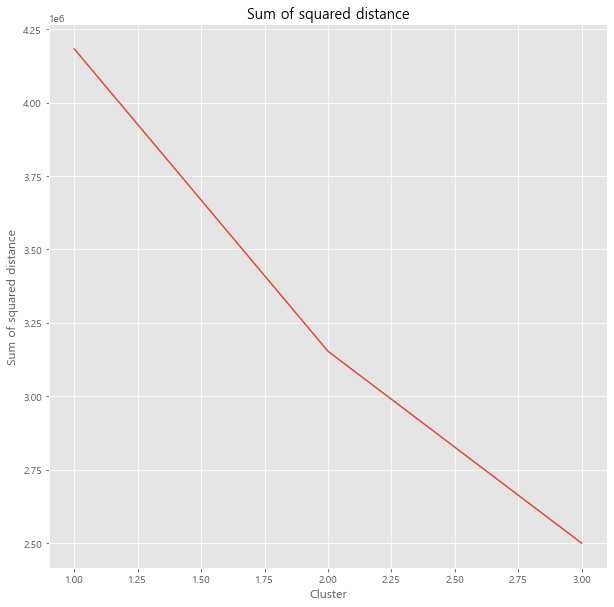

In [47]:
plt.figure(figsize = (10,10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title("Sum of squared distance")
plt.xlabel('Cluster')
plt.ylabel('Sum of squared distance')

#### k-평균 군집 번호 생성

In [49]:
clus = KMeans(3)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
new_df['ClusterKmeans'] = cluster_kmeans
new_df.head()

,trip_minuate,fare,tips,tolls,extras,trip_total,trip_km,ClusterKmeans
0,3.0,4.50,0.0,0.0,0.0,4.50,0.6437,2
1,8.0,7.00,0.0,0.0,0.0,7.00,1.7703,2
3,1.0,3.75,0.0,0.0,0.0,3.75,0.3219,2
5,8.0,7.00,1.0,0.0,0.0,8.00,2.0921,1
11,12.0,10.00,0.0,0.0,0.0,10.00,3.5406,1


#### k-평균 군집별 데이터 요약

In [51]:
ds_summary_km = new_df.groupby("ClusterKmeans").agg(['min','mean','max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + '_' + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,trip_minuate_min,trip_minuate_mean,trip_minuate_max,fare_min,fare_mean,fare_max,tips_min,tips_mean,tips_max,...,tolls_max,extras_min,extras_mean,extras_max,trip_total_min,trip_total_mean,trip_total_max,trip_km_min,trip_km_mean,trip_km_max
0,1,0.0,11.471,1355.0,0.00,10.448,999.99,0.0,1.345,369.08,...,1.8,0.0,0.713,6667.66,0.00,12.507,6671.91,0.322,2.711,3.862
1,2,0.0,6.550,77.0,0.00,7.016,558.20,0.0,0.702,15.20,...,5.0,0.0,0.413,111.11,0.00,8.131,558.20,0.322,1.232,2.253
2,3,2.0,15.150,33.0,0.78,3051.603,9002.29,0.0,0.000,0.00,...,75.0,0.0,0.140,1.00,50.78,3102.993,9052.39,0.322,0.805,3.058


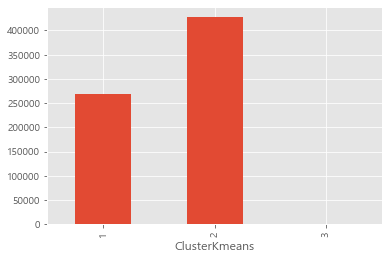

In [52]:
new_df.groupby('ClusterKmeans')['trip_total'].count().plot(kind='bar')

In [53]:
# 군집 번호 별로 데이터 프레임 생성
df_1 = new_df[new_df['ClusterKmeans'] == 1]
df_2 = new_df[new_df['ClusterKmeans'] == 2]
df_3 = new_df[new_df['ClusterKmeans'] == 3]

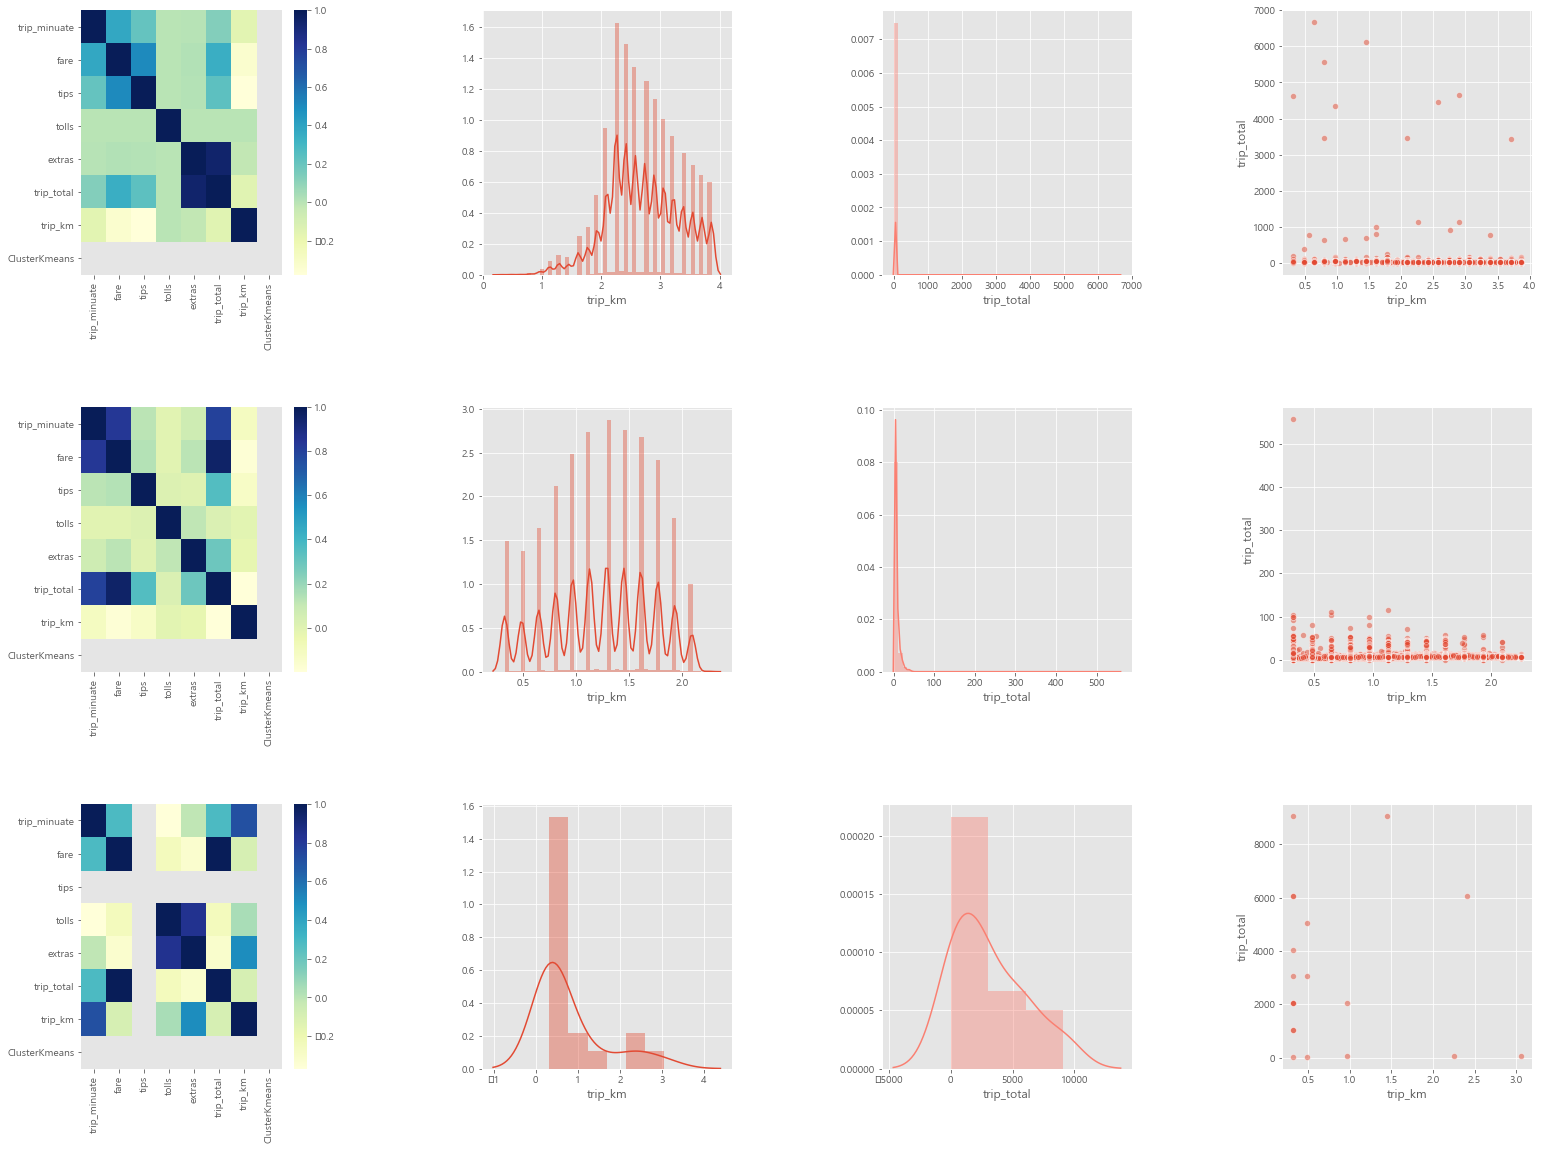

In [54]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(26,15))

sns.heatmap(df_1.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[0,0])
sns.heatmap(df_2.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[1,0])
sns.heatmap(df_3.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[2,0])

sns.distplot(df_1.trip_km, ax=ax[0,1])
sns.distplot(df_2.trip_km, ax=ax[1,1])
sns.distplot(df_3.trip_km, ax=ax[2,1])

sns.distplot(df_1.trip_total, ax=ax[0,2], color='salmon')
sns.distplot(df_2.trip_total, ax=ax[1,2], color='salmon')
sns.distplot(df_3.trip_total, ax=ax[2,2], color='salmon')

sns.scatterplot(data=df_1, y='trip_total', x='trip_km', ax=ax[0,3], alpha=0.5)
sns.scatterplot(data=df_2, y='trip_total', x='trip_km', ax=ax[1,3], alpha=0.5)
sns.scatterplot(data=df_3, y='trip_total', x='trip_km', ax=ax[2,3], alpha=0.5)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.6)